# Supervised Learning Models for Cirrhosis Prediction

## Abstract

The goal of this project was to create multiple machine learning models to find the best model used to predict the survival state of patients with liver cirrhosis. The survival states include: 0 = D (death), 1 = C (censored) and 2 = CL (censored due to liver transplantation).

This project involved data wrangling using Python to extract clean and consolidate the data by handling missing values. The categorical features in the data were then encoded followed by handling class imbalance within the dataset. Once the data was pre-processed, supervised machine learning models were then created and evaluated to predict the 'Status' feature. Hyperparameters for these models were optimised using GridSearch.

The models used in this project were: Support Vector Machine (SVM), K-nearest Neighbours (KNN), Random Forest and Extreme Gradient Boosting (XGBoost)

## Background 

Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption. The data provided is sourced from a Mayo Clinic study on primary biliary cirrhosis (PBC) of the liver carried out from 1974 to 1984.

**Load and explore the training and test dataset, do necessary pre-processing.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.notebook_repr_html", False)  # disable "rich" output

# Read csv files as a pandas DataFrame
test_data = pd.read_csv("crrrhosis_test.csv", comment="#")

train_data = pd.read_csv("cirrhosis_train.csv", comment="#")

**Preview the data**

In [4]:
test_data.head(5)

   testID  N_Days  Status             Drug    Age Sex Ascites Hepatomegaly  \
0       1    2583     NaN  D-penicillamine  18393   F       N            N   
1       2    1360     NaN  D-penicillamine  24020   M       N            N   
2       3    3445     NaN          Placebo  23445   M       N            Y   
3       4    1235     NaN  D-penicillamine  23241   F       N            N   
4       5     786     NaN          Placebo  16839   F       N            Y   

  Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0       N     N        0.4        127.0     3.50      14    1062.0   49.60   
1       N     N        1.8        416.0     3.94     121   10165.0   79.98   
2       Y     N        0.6        252.0     3.83      41     843.0   65.10   
3       Y     N        3.8        426.0     3.22      96    2716.0  210.80   
4       N     N        2.9        332.0     3.60      86    1492.0  134.85   

   Tryglicerides  Platelets  Prothrombin  Stage  
0           

In [4]:
train_data.head(5)

   trainID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0        1     191      D          Placebo  24803   M       Y            Y   
1        2     326      D          Placebo  18199   F       N            Y   
2        3    1067     CL          Placebo  17874   F       N            Y   
3        4     824      D  D-penicillamine  19577   F       Y            Y   
4        5     186      D          Placebo  21483   F       N            Y   

  Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0       N     Y        1.3        151.0     3.08    73.0    1112.0   46.50   
1       Y     S        6.6        244.0     3.41   199.0    1819.0  170.50   
2       N     S        8.7        310.0     3.89   107.0     637.0  117.00   
3       Y     N        1.2        269.0     3.12     NaN    1441.0  165.85   
4       Y     N        3.2        260.0     3.19    91.0     815.0  127.10   

   Tryglicerides  Platelets  Prothrombin  Stage  
0           

**Check training and test dataset size.**

In [5]:
# Show the size of the DataFrame
print("Size of the training datset:", test_data.shape)
print("Size of the test datset:", train_data.shape)

Size of the training datset: (88, 20)
Size of the test datset: (224, 20)


**Identify feature types of the data set**

In [2]:
# Show feature types
print(test_data.dtypes)

testID             int64
N_Days             int64
Status           float64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper             int64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object


**Identify which feature has missing values.**

In [5]:
# Check for missing values in each column
test_missing_values = test_data.isnull().any()
train_missing_values = train_data.isnull().any()

# Display columns with missing values
print("Testing Columns with missing values:")
print(test_missing_values[test_missing_values == True])

print("Training Columns with missing values:")
print(train_missing_values[train_missing_values == True])

Testing Columns with missing values:
Status           True
Cholesterol      True
Tryglicerides    True
Platelets        True
dtype: bool
Training Columns with missing values:
Cholesterol      True
Copper           True
Tryglicerides    True
Platelets        True
dtype: bool


**Impute missing values in training data.**

As the missing values are all floats we can replace them with the mean.

The only feature we don't deal with missing values for is the 'Status' feature for the testing set as all values are 'NaN' as this will be predicted based on the features in this set.

In [6]:
from sklearn.impute import SimpleImputer

# Columns to apply imputation
columns_to_impute = ['Cholesterol', 'Copper', 'Tryglicerides', 'Platelets']

# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform only the selected columns
imputed_values = imputer.fit_transform(train_data[columns_to_impute])

# Create a DataFrame with imputed values
df_imputed = pd.DataFrame(imputed_values, columns=columns_to_impute)

# Replace the selected columns in the original DataFrame with the imputed values
train_data[columns_to_impute] = df_imputed

# Check if there are any missing values left
print("Number of missing values after imputation:", train_data[columns_to_impute].isnull().sum().sum())

Number of missing values after imputation: 0


**Impute missing values in test data.**

In [8]:
# Columns to apply imputation
columns_to_impute = ['Cholesterol', 'Tryglicerides', 'Platelets']

# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform only the selected columns
imputed_values = imputer.fit_transform(test_data[columns_to_impute])

# Create a DataFrame with imputed values
df_imputed = pd.DataFrame(imputed_values, columns=columns_to_impute)

# Replace the selected columns in the original DataFrame with the imputed values
test_data[columns_to_impute] = df_imputed

# Check if there are any missing values left
print("Number of missing values after imputation:", test_data[columns_to_impute].isnull().sum().sum())

Number of missing values after imputation: 0


**Feature scale data**

In [8]:
from sklearn.preprocessing import StandardScaler
# Select numeric features for scaling
numeric_features = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Apply StandardScaler to scale the numeric features
scaler = StandardScaler()
train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])
test_data[numeric_features] = scaler.fit_transform(test_data[numeric_features])

# Display the scaled dataframe
print("Training data scaled:")
print(train_data.head(3))
print("Testing data scaled:")
print(test_data.head(3))

Training data scaled:
   trainID    N_Days Status     Drug       Age Sex Ascites Hepatomegaly  \
0        1 -1.554713      D  Placebo  1.720921   M       Y            Y   
1        2 -1.439311      D  Placebo  0.019242   F       N            Y   
2        3 -0.805879     CL  Placebo -0.064502   F       N            Y   

  Spiders Edema  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
0       N     Y  -0.455232    -1.023194 -0.988035 -0.328687 -0.451841   
1       Y     S   0.621364    -0.590760 -0.211061  1.184735 -0.149634   
2       N     S   1.047940    -0.283871  0.919083  0.079697 -0.654880   

       SGOT  Tryglicerides  Platelets  Prothrombin  Stage  
0 -1.420221      -1.421174  -0.495242     2.327877      4  
1  0.845308      -0.663936  -1.316106     1.266854      3  
2 -0.132159       2.058516   0.366158    -1.144561      2  
Testing data scaled:
   testID    N_Days  Status             Drug       Age Sex Ascites  \
0       1  0.592464     NaN  D-penicillamine -0.06509

**Encode the categorical features.**

One-hot encoding is the method of choice as categorical variables are nominal (unordered) and have no inherent ordinal relationship.

**Encoding testing data**

In [9]:
# Select categorical columns for one-hot encoding
categorical_columns = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug']

# Apply one-hot encoding
test_encoded = pd.get_dummies(test_data, columns=categorical_columns)

# Display the encoded DataFrame
print(test_encoded.head(5))

   testID    N_Days  Status       Age  Bilirubin  Cholesterol   Albumin  \
0       1  0.592464     NaN -0.065099  -0.670095    -0.986491 -0.179447   
1       2 -0.645684     NaN  1.424999  -0.229798     0.207462  0.919948   
2       3  1.465141     NaN  1.272732  -0.607195    -0.470075  0.645099   
3       4 -0.772232     NaN  1.218710   0.399198     0.248775 -0.879061   
4       5 -1.226793     NaN -0.476617   0.116150    -0.139569  0.070416   

     Copper  Alk_Phos      SGOT  ...  Ascites_Y  Hepatomegaly_N  \
0 -0.857087 -0.319866 -1.127595  ...      False            True   
1  0.337102  6.206239 -0.628866  ...      False            True   
2 -0.555750 -0.476871 -0.873141  ...      False           False   
3  0.058086  0.865916  1.518722  ...      False            True   
4 -0.053520 -0.011591  0.271900  ...      False           False   

   Hepatomegaly_Y  Spiders_N  Spiders_Y  Edema_N  Edema_S  Edema_Y  \
0           False       True      False     True    False    False   
1     

**Encoding training data**

In [10]:
# Select categorical columns for one-hot encoding
categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Apply one-hot encoding
train_encoded = pd.get_dummies(train_data, columns=categorical_columns)

# Display the encoded DataFrame
print(train_encoded.head(7))

   trainID    N_Days Status       Age  Bilirubin  Cholesterol   Albumin  \
0        1 -1.554713      D  1.720921  -0.455232    -1.023194 -0.988035   
1        2 -1.439311      D  0.019242   0.621364    -0.590760 -0.211061   
2        3 -0.805879     CL -0.064502   1.047940    -0.283871  0.919083   
3        4 -1.013604      D  0.374316  -0.475545    -0.474514 -0.893857   
4        5 -1.558987      D  0.865443  -0.069282    -0.516362 -0.729044   
5        6  1.178190      C  1.214076  -0.597424    -0.739554  1.248708   
6        7  1.868895      C -0.073006  -0.475545    -0.525662  0.165654   

         Copper  Alk_Phos      SGOT  ...  Sex_M  Ascites_N  Ascites_Y  \
0 -3.286872e-01 -0.451841 -1.420221  ...   True      False       True   
1  1.184735e+00 -0.149634  0.845308  ...  False       True      False   
2  7.969651e-02 -0.654880 -0.132159  ...  False       True      False   
3  5.551115e-17 -0.311210  0.760350  ...  False      False       True   
4 -1.124841e-01 -0.578794  0.05237

**Identify the class imbalance issue**

In [11]:
# Show the label distribution
label_distribution = train_data['Status'].value_counts()
print(label_distribution)

Status
C     119
D      93
CL     12
Name: count, dtype: int64


Based on the label distribution we can see the number of samples in each class are not equal with the CL label being significantly lower compared to the C and D class. We can say that the training set is not balanced as a result.

This is generally expected in medical data where the study involves diseases and treatments.

We can work around the imbalanced class distribution using SMOTE.

**Apply SMOTE to deal with imbalanced training set**

In [12]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = train_encoded.drop(columns=['trainID', 'N_Days', 'Status'])
y = train_encoded['Status']

# Apply SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

**Label distribution after re-sampling using SMOTE**

In [14]:
# Show the label distribution
label_distribution = y_train_resampled.value_counts()
print(label_distribution)

Status
D     119
CL    119
C     119
Name: count, dtype: int64


## Supervised machine learning models for predicting "Status".


**Model 1: Support Vector Machine (SVM)**

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [16]:
from sklearn.svm import SVC

# Define the hyperparameters grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
svm_best_params = grid_search.best_params_

# Get the best model
svm_best_model = grid_search.best_estimator_

# Evaluate the best model
svm_y_pred_best = svm_best_model.predict(X_test)

# Calculate accuracy on testing data
svm_test_accuracy = accuracy_score(y_test, svm_y_pred_best)

# Calculate accuracy on training data
svm_y_train_pred = svm_best_model.predict(X_train)
svm_training_accuracy = accuracy_score(y_train, svm_y_train_pred)

print("Best Model Performance:")
print("Best Hyperparameters:", svm_best_params)
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred_best))
print("\n Testing Accuracy:", svm_test_accuracy)
print("\n Training Accuracy:", svm_training_accuracy)
print("\nClassification Report:\n", classification_report(y_test, svm_y_pred_best))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Model Performance:
Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Confusion Matrix:
 [[12  3  8]
 [ 1 18  0]
 [ 3  0 27]]

 Testing Accuracy: 0.7916666666666666

 Training Accuracy: 0.9368421052631579

Classification Report:
               precision    recall  f1-score   support

           C       0.75      0.52      0.62        23
          CL       0.86      0.95      0.90        19
           D       0.77      0.90      0.83        30

    accuracy                           0.79        72
   macro avg       0.79      0.79      0.78        72
weighted avg       0.79      0.79      0.78        72



Based on the calculated performance metrics for the SVM model with RBF kernel, the accuracy of the model is 0.7916 suggesting that the model can correctly predict class labels 79.17% of the instances in the test set.

Looking at the precision, recall and F1-score:

For class C (Censored): Precision is 0.75, Recall is 0.52 and F1-Score is 0.62.

For class CL (Censored due to liver transplantation): Precision is 0.86, Recall is 0.95 and F1-Score is 0.90.

For class D (Death): Precision is 0.77, Recall is 0.90 and F1-Score is 0.83.

Overall the model shows good performance, being able to best predict class 'CL' and struggles to predict class 'C' relative to the other classes in terms of its precision, recall and F1-score. This is further shown by the confusion matrix showing some instances of misclassification of class 'C' and class 'D'.  

Looking at the training accuracy (93.68%) compared to the testing accuracy (79.17%) the decrease in accuracy suggests overfitting towards the training data. This may suggest that the model may not generalise well towards unseen data as the model may have learnt the noise and patterns that are specific to the training data. 

Overall based on the differences between the training and testing accuracy there is likelihood of the model being overfitted to some extent.

**Model 2: KNN**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [18]:
# Define the hyperparameters grid for KNN
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9]  # Number of neighbors to consider
}

# Instantiate the GridSearchCV object
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the GridSearchCV object to the data
knn_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_n_neighbors = knn_grid_search.best_params_['n_neighbors']

# Get the best model
best_knn_model = knn_grid_search.best_estimator_

# Evaluate the best model
knn_y_pred_best = best_knn_model.predict(X_test)

# Calculate accuracy on testing data
knn_accuracy = accuracy_score(y_test, knn_y_pred_best)

# Calculate accuracy on training data
knn_y_train_pred = best_knn_model.predict(X_train)
knn_training_accuracy = accuracy_score(y_train, knn_y_train_pred)

print("Best KNN Model Performance:")
print("Best n_neighbors:", best_n_neighbors)
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_y_pred_best))
print("\n Testing Accuracy:", knn_accuracy)
print("\n Training Accuracy:", knn_training_accuracy)
print("\nClassification Report:\n", classification_report(y_test, knn_y_pred_best))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best KNN Model Performance:
Best n_neighbors: 5
Confusion Matrix:
 [[15  6  2]
 [ 0 19  0]
 [ 4  7 19]]

 Testing Accuracy: 0.7361111111111112

 Training Accuracy: 0.8350877192982457

Classification Report:
               precision    recall  f1-score   support

           C       0.79      0.65      0.71        23
          CL       0.59      1.00      0.75        19
           D       0.90      0.63      0.75        30

    accuracy                           0.74        72
   macro avg       0.76      0.76      0.73        72
weighted avg       0.79      0.74      0.74        72



Based on the calculated performance metrics for the knn model we can see that the overall accuracy of the model is 0.7361, meaning it can correctly predict the class labels approximately 73.61% of the samples in the test set.

Looking at the precision, recall and F1-score:

For class C (Censored): Precision is 0.79, Recall is 0.65 and F1-Score is 0.71.

For class CL (Censored due to liver transplantation): Precision is 0.59, Recall is 1.00 and F1-Score is 0.75.

For class D (Death): Precision is 0.90, Recall is 0.63 and F1-Score is 0.75.

Overall the precision, recall and F1-scores for each class indicate that the model can perform well for all three classes fairly evenly. 

The training accuracy of 100% is very high, suggesting that the model perfectly fits the training data, as testing accuracy is 73.61% this reduction in accuracy indicates overfitting of the model. This suggests that the model learnt noise and patterns specific to the training data too well and has resulted in poorer generalisation to new and unseen data. 
This is possibly due to the optimal `n_neighbors` equal to 1, we could try to address this issue by increasing the value of `n_neighbors` and reduce model complexity.

**Model 3: Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [10, 20, 30, None],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
rf_best_params = grid_search.best_params_

# Get the best model
rf_best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
rf_y_pred_best = rf_best_model.predict(X_test)

# Calculate accuracy
rf_testing_accuracy = accuracy_score(y_test, rf_y_pred_best)
rf_training_accuracy = accuracy_score(y_train, rf_best_model.predict(X_train))

# Print the performance metrics
print("Best Random Forest Model Performance:")
print("Best Hyperparameters:", rf_best_params)
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred_best))
print("\nTesting Accuracy:", rf_testing_accuracy)
print("\nTraining Accuracy:", rf_training_accuracy)
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred_best))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


D:\Coding\Anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Random Forest Model Performance:
Best Hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
 [[16  0  7]
 [ 0 19  0]
 [ 5  0 25]]

Testing Accuracy: 0.8333333333333334

Training Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           C       0.76      0.70      0.73        23
          CL       1.00      1.00      1.00        19
           D       0.78      0.83      0.81        30

    accuracy                           0.83        72
   macro avg       0.85      0.84      0.84        72
weighted avg       0.83      0.83      0.83        72



Based on the calculated performance metrics for the random forest model we can see that the overall accuracy of the model is 0.8333, meaning it can correctly predict the class labels approximately 83.33% of the samples in the test set.

Looking at the precision, recall and F1-score:

For class C (Censored): Precision is 0.76, Recall is 0.70 and F1-Score is 0.73.

For class CL (Censored due to liver transplantation): Precision is 1.00, Recall is 1.00 and F1-Score is 1.00.

For class D (Death): Precision is 0.78, Recall is 0.83 and F1-Score is 0.81.

Overall the model shows good performance, being able to best predict class 'CL' and struggles to predict class 'C' relative to the other classes in terms of its precision, recall and F1-score. 

A training accuracy of 100% again suggests that the model has likely learnt the noise and patterns of the training data. As the testing accuracy is lower this further suggests that the model is overfitting and has not generalised well to new and unseen data.

Overall this model performs the best out of the three with the highest accuracy and smallest decrease in accuracy when compared to the training accuracy suggesting it is the least overfitted model out of the three.

**Model 4: XGBoost**

XGBoost requires the target variable to be encoded as integers. To resolve this, we can convert the categorical target values to numerical labels.

**Determine optimal hyperparameters**

In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming X_train_resampled and y_train_resampled are already defined
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)

X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled_encoded, test_size=0.2, random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [100, 200, 300]
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 1.0}


**Build XGBoost model using best hyperparameters**

In [26]:
# Initialize the XGBoost model with the best hyperparameters
xgb_clf = xgb.XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=3,
    n_estimators=100,
    subsample=1.0,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Fit the model on the training data
xgb_clf.fit(X_train, y_train)

# Predictions on training data
xgb_y_train_pred = xgb_clf.predict(X_train)
# Predictions on test data
xgb_y_test_pred = xgb_clf.predict(X_test)

# Calculate accuracies
xgb_train_accuracy = accuracy_score(y_train, y_train_pred)
xgb_test_accuracy = accuracy_score(y_test, y_test_pred)

# Evaluate the model
print("Best XGBoost Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_test_pred))
print("\nTesting Accuracy:", xgb_test_accuracy)
print("\nTraining Accuracy:", xgb_train_accuracy)
print("\nClassification Report:\n", classification_report(y_test, xgb_y_test_pred))

Best XGBoost Model Performance:
Confusion Matrix:
 [[15  0  8]
 [ 0 19  0]
 [ 3  1 26]]

Testing Accuracy: 0.8333333333333334

Training Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.95      1.00      0.97        19
           2       0.76      0.87      0.81        30

    accuracy                           0.83        72
   macro avg       0.85      0.84      0.84        72
weighted avg       0.84      0.83      0.83        72



Based on the performance metrics this model appears to have performed equally well to the Random Forest Model. Again this model has a similar issue where training accuracy is 100% suggesting that the model has likely learnt the noise and patterns of the training data. As the testing accuracy is lower this further suggests that the model is overfitting and has not generalised well to new and unseen data.

### Results

SVM, KNN and Decision tree are commonly used algorithms in classification tasks and are suitable for some of the characteristics of this dataset.

SVM with RBF Kernel:
SVM works well with high-dimensional feature spaces making it useful in this situation where there are many features. Furthermore SVM can handle non-linear decision boundaries using the kernel trick particularly by applying different kernel functions to see which could perform better. As SVM aims to maximise the margin between classes the goal was to  try and reduce overfitting. Furthermore the use of regularisation parameters can aim to balance the trade-off between a low training error and minimising model complexity. 

K-Nearest Neighbours (KNN):
KNN was used to attempt to capture non-linear relationships between the features and the target variable. Furthermore as KNN can classify using both numerical and categorical features it was also a good choice. As KNN can handle multi-class classification problems, KNN's ability to handle multiple classes also made this an appropriate choice. 
KNN is generally robust to irrelevant features, as there were many and different features in the dataset, KNN was selected to see if it could identify a relationship based on the distances between the datapoints. 

Random Forest:
As Random Forest is an ensemble learning method it aims to utilise the benefits of building multiple decision trees and combining their results to make a prediction. 
This aims to reduce overfitting compared to using an individual decision tree, as a single tree may easily overfit, averaging multiple trees can smooth out the predictions to generalise better towards unseen data. Random Forest inherently provides feature importance which can identify the most influential features and prioritise them during the training process, by focusing on the most important features we can reduce the impact of overfitting by focusing on these features and reduce the impact of non-influential features and noise. 
Random Forest is versatile as it can handle both classification and regression tasks, in this case a multi-class classification problem is handled fairly well by this model design. 


XGBoost (Extreme Gradient Boosting):
Seeing the drastic improvement in model prediction accuracy using ensemble training methods, I wanted to utilise an advanced ensemble training method to achieve higher performance. XGBoost uses the boosting ensemble technique, boosting is a sequential ensemble method where models are trained one after another, and each new model aims to correct the errors made by the previous models. In gradient boosting, each new model is trained to reduce the residual errors of the previous models, effectively improving the overall predictive power of the ensemble. XGBoost overall has more hyperparameters which allows for greater tuning when compared to Random Forest, the decision behind using XGBoost was the idea that greater tuning could result in higher performance.

**Rationale behind hyper-parameter tuning**

**SVM with Linear Kernel:**

Hyperparameters:

*Kernel:* The kernel function determines the shape of the decision boundary by transforming the input data into higher-dimensional space. Different kernel functions aim to capture different types of relationships within the data. In this case an RBF kernel was found to be most optimal, mapping the input data into an infinite-dimensional space. 

*C:* Is the regularisation parameter which controls the trade-off bewteen achieving a low error on the training data and minimising the model complexity to avoid overfitting. In this case a C of 1 was found to be most optimal (default value). 

*Gamma*: Is th kernel coefficient, this defines how much influence the training example reaches. In this game it was found that a gamma of 0.1 was most optimal. Low gamma makes the decision boundary more smooth and generalised aiming to reduce the risks of overfitting.

**KNN:**

Hyperparameters:

*n-neighbours:* n-neighbours determined the nearest neighbours to use for the voting process. In this case Grid Search Cross-Validation was performed to find the best performance using different values of n-neighbours. Through this it was found that n=1 was the most optimal hyperparameter. 

**Random Forest:**

Hyperparameters: 

*n-estimators:* Determines the number of trees in the forest, increasing this generally leads to better performance and aims to reduce overfitting by averaging the predictions from multiple trees. The trade-off however is higher computation cost. In this case n-estimators of 100 was determined to be most optimal.

*max-features:* Determines the number of features to consider when looking for the best split. In this case auto which is equal to square root of the total number of features was used to be the maximum number of features to consider for the split. This hyperparameter aims to control the number of features randomly chosen at each split aiming to reduce correlation bewteen trees and promote diversity as a result.

*max-depth:* Determines the maximum depth of each tree in the forest. In this case 20 was determined to be most optimal. This aims to find a balance of a deep tree (overly complex and overfitting) versus a shallow tree (underfitting)

*min_samples_split:* Determines the minimum number of samples required to split an internal node. In this case a value of 2 was used. Overall this hyperparameter aims to control the growth of the tree by preventing splits that result in small samples in a child node. Larger values overall may prevent overfitting by mmay lead to biased models. 

*min_samples_leaf:* Determines the minimum number of samples required to be at a leaf node. In this case a value of 1 was used. This hyperparameter aims to prevent trees from growing too deep and aims to capture general patterns in the data. Using high values may prevent overfitting by may lead to biased models.


**XGBoost (Extreme Gradient Boosting):**

Hyperparameters: 

*learning_rate*: Controls the step size at each boosting step. Lower values can improve the model’s performance by reducing the risk of overfitting, but the training process will be slower. Higher values can speed up training but might lead to overfitting. In this case the most optimal learning rate was found to be 0.1.

*colsample_bytree*: Determines the fraction of features used for each tree. In this case a value of 0.8 was found to be most optimal.

*max_depth*:  Maximum depth of a tree. Higher values increase model complexity. In this case the most optimal depth was found to be 5.

*min_child_weight*: Specifies the minimum sum of the weights of all observations required in a child node. In this case a value of 3 was found to be most optimal.

*n_estimators*: Determines the number of boosting rounds or trees to be added to the model. Increasing the number of estimators can improve model performance, but after a certain point, it may lead to overfitting. It also increases training time. In this case the most optimal number of boosting rounds/trees was found to be 100.

*sub-sample*: Determines the proportion of the training data used for each boosting round. Values less than 1.0 help prevent overfitting by adding randomness to the training process. Common values range from 0.5 to 1.0. In this case a sub-sample of 1.0 was found to be most optimal.



### Handling label imbalance issues 

**Resampling techniques:**

Undersampling: We could consider removing samples from the majority class to balance the class distribution to reduce the dominance of the majority clas but this could possible result in loss of information.

Oversampling: We could duplicate or generate synthetic samples of the minority class to match the size of the majority class, this may increase the risks of overfitting which is already a prominent problem.

**Algorithmic techniques:**

Class Weighting: We could assign higher weights to samples from the minority class during model training. A balanced weighting was attempted in SVM without much success.

**Evaluation metrics:**

Metrics that are robust to class imbalance such as Area Under the ROC curve could be attempted. 

Consider stratified cross-validation to ensure the same class distribution is maintained compared to the original dataset. 

**Other:**

Collect more data, particularly from the minor class to improve the models ability to learn from all classes.

Add additional features which may help to distinguish between different classes more effectively. When combined with domain expertise it may be possible to identify and obtain more useful features.

Consider dimensionality reduction to extract information from high-dimensional data to reduce the impact of noise, this however runs the risk of information loss, particularly when information about the minority class is already sparse.

In this case, an over sampling technique called SMOTE (Synthetic Minority Over-sampling Technique) was used as it generates synthetic samples of the minority class. SMOTE identifies the minority class based on the class distribution of the dataset then randomly selects a sample from the minority data set and finds its k-nearest neighbours in the feature space. It then generates synthetic samples by interpolating between the selected sample and its nearest neighbours then adds these synthetic samples to the minority class dataset. By doing this SMOTE aims to make the class distribution more balanced and help improve the performance of the machine learning model. However a potential drawback is that by applying a technique like SMOTE, the new synthetic samples may introduce noise or lead to overfitting of data which could have potentially been the case based on these models.

**Model recommendation**

Overall, despite all three models having similar and good performance in predicting the target variable, based on the reported results the random forest and XGBoost model had the highest performance of the four. Given a Random Forest is less complex than an XGBoost, following the concept of Occam's razor, the Random Forest model would be the model recommendation.

Albeit Random Forest being an ensemble model, while not as easily interpretable as a single decision tree, it still provides a level of interpretability that is better compared to a complex model like SVM. 

Furthermore as Random Forest inherently contains techniques like feature importance and is an ensemble training method it is also the model of choice as it is able to draw more insight from the training data as a result. 

Furthermore by utilising the feature importance from Random Forest we an draw out draw out the most important features used to predict the target variable. By knowing which features have more influence in the decision making process, in a real-life scenario we would be able to target these particular features when trying to assess and manage Cirrhosis in patients. 

For example, knowing that features like Bilirubin and Prothrombin are one of the most important features we could be able to screen and look for individuals with levels of these features that would put them at higher risk of developing Cirrhosis to begin monitoring or early intervention.

## Perform a prediction on the pre-processed test set with the best model 


The best model obtained from testing was the Random Forest model as it had the highest performance metrics out of the three.

In [20]:
# Obtain just clinical features from testing data
testing_clinical_features = test_encoded.drop(columns=['testID', 'N_Days', 'Status'])

# Get the column order from training data
training_columns = X_train.columns

# Reorder the columns in testing data to match the order in training data
testing_clinical_features = testing_clinical_features[training_columns]

# Predict 'Status' using the trained model
rf_predicted_status = rf_best_model.predict(testing_clinical_features)

# Convert 'rf_predicted_status' to a DataFrame
predicted_df = pd.DataFrame({'Status': rf_predicted_status})

# Get the 'testID' column
testID_column = test_encoded['testID'].reset_index(drop=True)  # Reset index to match 'y_pred_dt'

# Concatenate the two DataFrames horizontally
best_performing_model = pd.concat([testID_column, predicted_df], axis=1)

# Print the resulting DataFrame
print(best_performing_model)

#Save to a csv file
best_performing_model.to_csv('model_prediction_kouch.csv', index=False)

    testID Status
0        1      C
1        2      D
2        3      C
3        4      D
4        5     CL
..     ...    ...
83      84      C
84      85      C
85      86      C
86      87      C
87      88      D

[88 rows x 2 columns]


## Exploring and analysing the importance of features for predicting "Status" 

### Using Feature Importance

Feature importance in decision trees is a technique used to determine the significance of each feature in predicting the target variable. 
This aids in understanding which features have the most influence on the decision-making process of the model.

The feature importance is calculated by how much each feature is able to contribute to decreasing the impurity (ie, the Gini index or Entropy) in the decision tree nodes. 

In general, the higher the importance score the more influential the feature is in making classification decisions. 

From a statistical perspective, we can calculate the mean importance score and standard deviations of feature importance across all the decision trees in the Random Forest Model. 

Features that have the higher mean importance score and the lower standard deviations are considered to be more robust and influential in predicting the target variable. 

In this case we can obtain the importance scores from our random forest model and calculate the mean and standard deviations.

We can then plot this to visualise this better and see which features are ranked from most to least importance.


In [21]:
# Get feature importance scores from all trees
all_importance_scores = []
for tree in rf_best_model.estimators_:
    all_importance_scores.append(tree.feature_importances_)

# Calculate mean importance score and standard deviation
mean_importance_scores = np.mean(all_importance_scores, axis=0)
std_importance_scores = np.std(all_importance_scores, axis=0)

# Print mean importance scores and standard deviations
for feature, mean_score, std_score in zip(X_train.columns, mean_importance_scores, std_importance_scores):
    print(f"Feature: {feature}, Mean Importance Score: {mean_score}, Standard Deviation: {std_score}")

Feature: Age, Mean Importance Score: 0.08074808740205988, Standard Deviation: 0.05276574423987461
Feature: Bilirubin, Mean Importance Score: 0.14958219521882515, Standard Deviation: 0.09616104796399609
Feature: Cholesterol, Mean Importance Score: 0.06364650157535127, Standard Deviation: 0.041555585752688855
Feature: Albumin, Mean Importance Score: 0.06122443232600916, Standard Deviation: 0.03903814312474062
Feature: Copper, Mean Importance Score: 0.08911027093880079, Standard Deviation: 0.054798304006902124
Feature: Alk_Phos, Mean Importance Score: 0.072228041514325, Standard Deviation: 0.04600590133349868
Feature: SGOT, Mean Importance Score: 0.06112365980036445, Standard Deviation: 0.040256471799985184
Feature: Tryglicerides, Mean Importance Score: 0.04671252187366898, Standard Deviation: 0.03227851832549912
Feature: Platelets, Mean Importance Score: 0.06377299166158827, Standard Deviation: 0.03845843646241789
Feature: Prothrombin, Mean Importance Score: 0.12386565389638929, Standard

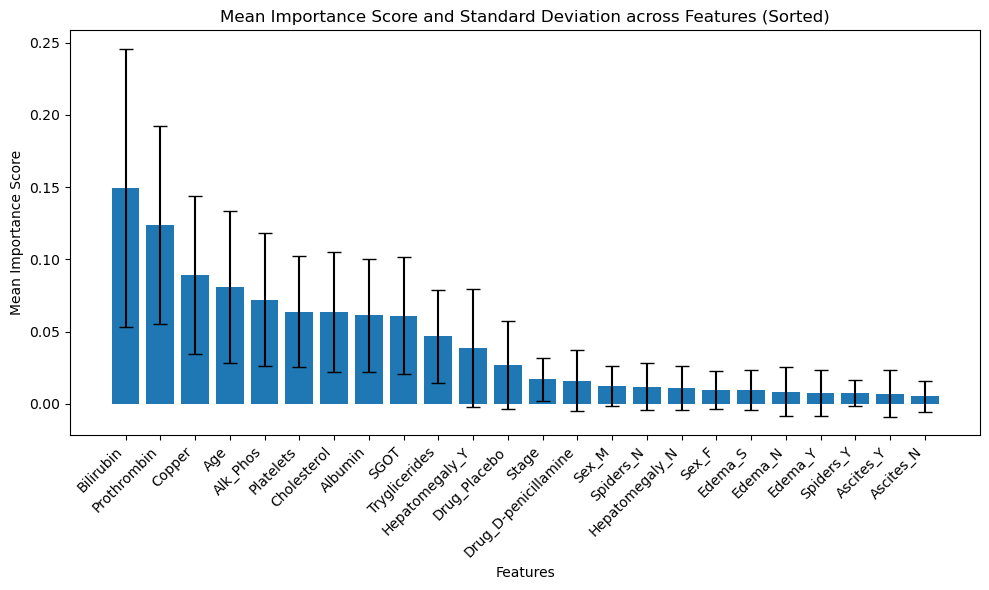

In [22]:
# Sort features and mean importance scores in descending order
sorted_indices = np.argsort(mean_importance_scores)[::-1]
sorted_features = np.array(X_train.columns)[sorted_indices]
sorted_mean_importance_scores = mean_importance_scores[sorted_indices]
sorted_std_importance_scores = std_importance_scores[sorted_indices]

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot mean importance scores
ax.bar(sorted_features, sorted_mean_importance_scores, yerr=sorted_std_importance_scores, capsize=5)

# Set labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Mean Importance Score')
ax.set_title('Mean Importance Score and Standard Deviation across Features (Sorted)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

Based on the plot we can see that the most important features in the Random Forest model is Bilirubin followed by Prothrombin and Copper. 

While the least important features are Spiders and Ascites. 


## Using Permutation Importance

Permutation importance is a technique used to measure the importance of the features in a model. It evaluates the impact of each feature on the model's performance by measuring how much the model's performance deteriorates when the values of that feature are randomly shuffled.

Permutation importance randomly permutates the values of a single feature while keeping other features unchanged and it assesses the changes in the models performance. 
By observing the changes in the performance metrics it can infer the importance of that feature.

In general features that cause the largest drop in performance when permuted are considered the most important.

We can then plot this to visualise this better and see which features contributes the most towards the model's performance.


D:\Coding\Anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


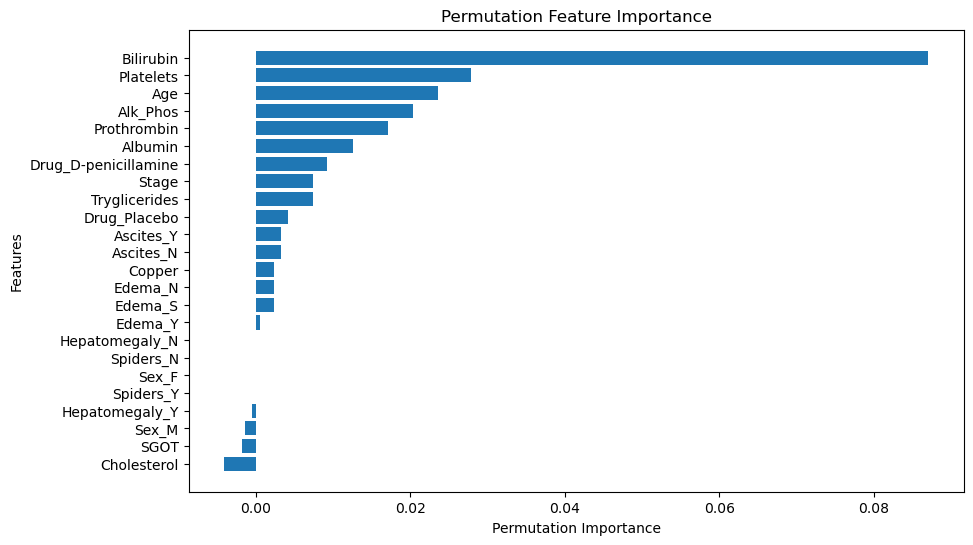

In [23]:
from sklearn.inspection import permutation_importance

# Train your random forest model
rf_best_model.fit(X_train, y_train)

# Compute permutation feature importance
perm_importance = permutation_importance(rf_best_model, X_test, y_test, n_repeats=30, random_state=42)

# Get feature importance scores and names
feature_importance = perm_importance.importances_mean
feature_names = X_test.columns

# Visualize feature importance
plt.figure(figsize=(10, 6))
sorted_indices = np.argsort(feature_importance)
plt.barh(range(len(feature_names)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Permutation Feature Importance')
plt.show()

By looking at the plot and observing the permutation importance we can see that Bilirubin and PLatelets contribute the greatest towards the model's performance. This closely matches the results obtained through Feature Importance also showing that Bilirubin was the most important feature.

However following these two features Permutation importance suggests that Platelets and Age next greatest contributing features which deviates from the findings found through Feature Importance.

In terms of the least contributing features Permutation Importance identifies that Sex, SGOT and Cholesterol are the considered the least important, which again is different to the least important features identified through Feature Importance (Spiders and Ascites)
